# Imports and setup

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%config Completer.use_jedi = False

# Parameters

In [3]:
path_data = "../data/kddcup.data"
path_names = "../data/kddcup.names"

# Load labels and datasets

In [4]:
names_types = []
names_names = []
with open(path_names) as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            names_types = line.replace('.','').strip().split(',')
        else:
            names_names.append(line.replace(':','').strip().split(' ')[0])
names_names.append("label")
print(f"len(names_types): {len(names_types)}, len(names_names): {len(names_names)}")

len(names_types): 23, len(names_names): 42


In [5]:
whole_df = pd.read_csv(path_data, header=None, names=names_names)
whole_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
whole_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

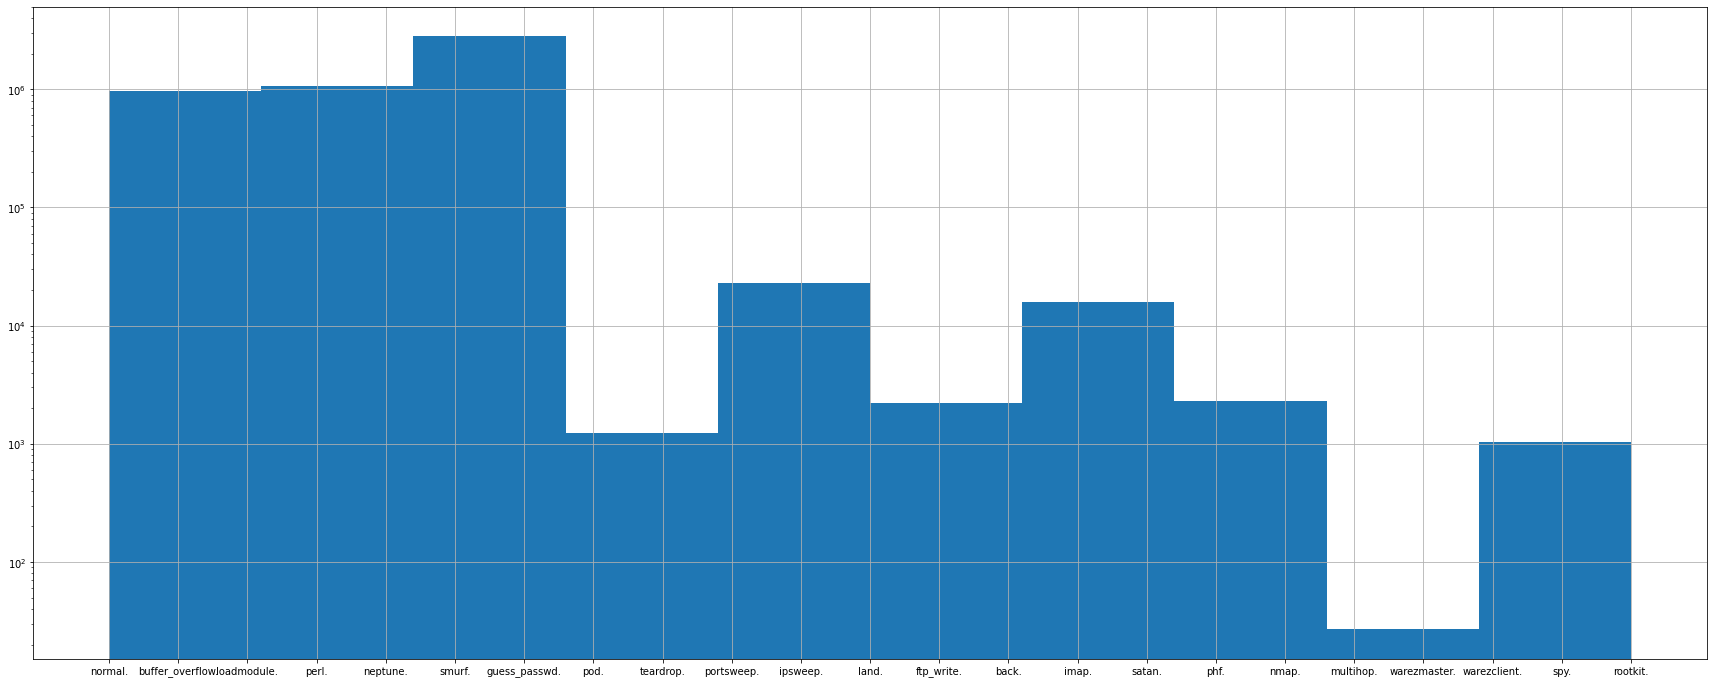

In [80]:
whole_df.label.hist(figsize=(30,12))
plt.yscale('log')
plt.show()

# Look into data

In [7]:
non_numerical_names = ['protocol_type', 'service', 'flag', 'label']

# Prepare data

In [9]:
from sklearn.preprocessing import OneHotEncoder

ll = pd.DataFrame(whole_df.label)
out = {}
BB = []
def f(x):
    a, b = pd.factorize(x)
    out[x.name] = len(b)
    BB = b
    return a
b = ll.apply(f)

encoded_df = b

for col in whole_df.columns:
    if col == 'label':
        pass
    elif col in ['protocol_type', 'service', 'flag']:
        encoded_df = pd.concat([encoded_df, pd.get_dummies(whole_df[col], prefix=col)], axis=1)
    else:
        encoded_df = pd.concat([encoded_df, whole_df[col]], axis=1)

In [10]:
encoded_df.head()

,label,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(encoded_df, test_size=0.3)

In [12]:
train_df.head()

,label,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1073490,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,13,1.0,1.0,0.0,0.0,0.12,0.06,0.0,255,13,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0
2587291,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
1736047,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
4625123,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,1,0.0,0.0,1.0,1.0,0.01,0.08,0.0,255,1,0.00,0.08,0.0,0.0,0.0,0.0,1.0,1.0
2980280,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf

training_dataset = tf.data.Dataset.from_tensor_slices(
    (
        tf.cast(train_df[encoded_df.columns[1:]].values, tf.float32),
        tf.cast(train_df['label'].values, tf.int32)
    )
)

In [35]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(out['label'])
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [36]:
fmnist_train_ds = training_dataset.batch(32)

In [37]:
model.fit(fmnist_train_ds, epochs=10)

Epoch 1/10
107154/107154 [==============================] - 137s 1ms/step - loss: 59.0107 - accuracy: 0.9921
Epoch 2/10
107154/107154 [==============================] - 137s 1ms/step - loss: 48.4033 - accuracy: 0.9944
Epoch 3/10
107154/107154 [==============================] - 133s 1ms/step - loss: 46.6147 - accuracy: 0.9951
Epoch 4/10
107154/107154 [==============================] - 142s 1ms/step - loss: 61.5561 - accuracy: 0.9959
Epoch 5/10
107154/107154 [==============================] - 125s 1ms/step - loss: 59.2017 - accuracy: 0.9962
Epoch 6/10
107154/107154 [==============================] - 128s 1ms/step - loss: 53.9719 - accuracy: 0.9964
Epoch 7/10
107154/107154 [==============================] - 128s 1ms/step - loss: 47.3077 - accuracy: 0.9967
Epoch 8/10
107154/107154 [==============================] - 129s 1ms/step - loss: 42.9466 - accuracy: 0.9965
Epoch 9/10
107154/107154 [==============================] - 130s 1ms/step - loss: 49.5271 - accuracy: 0.9967
Epoch 10/10
107154/

In [38]:
testing_dataset = tf.data.Dataset.from_tensor_slices(
    (
        tf.cast(test_df[encoded_df.columns[1:]].values, tf.float32),
        tf.cast(test_df['label'].values, tf.int32)
    )
)
testing_dataset_b = testing_dataset.batch(32)

In [39]:
results = model.evaluate(testing_dataset_b)

45923/45923 [==============================] - 31s 672us/step - loss: 410.9126 - accuracy: 0.9974


In [40]:
print("test loss, test acc:", results)

test loss, test acc: [410.91259765625, 0.997371256351471]


In [41]:
from sklearn.metrics import plot_confusion_matrix

In [42]:
X_test = tf.cast(train_df[encoded_df.columns[1:]].values, tf.float32),
y_test = tf.cast(train_df['label'].values, tf.int32)

In [45]:
preds = model.predict(X_test)

In [51]:
y_pred = np.argmax(preds, axis=1)

In [52]:
cfm = tf.math.confusion_matrix(y_test, y_pred)

In [55]:
import matplotlib.pyplot as plt

In [60]:
for row in cfm:
    print('|'.join([f'{n:6}' for n in row]))

675754|     0|     0|     0|    39|   259|     5|    20|     0|   103|    82|     2|     0|  5496|     0|    57|     0|    23|     0|     0|     0|     0|     0
    22|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0
     7|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0
     2|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0
   152|     0|     0|     0|750724|     0|     1|     0|     0|     4|     2|     0|     0|     1|     0|     0|     0|     0|     0|     0|     0|     0|     0
     2|     0|     0|     0|     0|1964172|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0|     0
     2|     0|     0|     0|     

In [70]:
cfm_cp = np.copy(cfm)

In [71]:
for i, row in enumerate(cfm):
    cfm_cp[i] = cfm_cp[i] * 255 / np.sum(row)

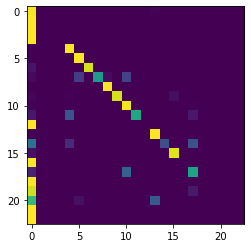

In [73]:
plt.imshow(cfm_cp)

In [74]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(out['label'])
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [76]:
history2 = model2.fit(fmnist_train_ds, epochs=10)

Epoch 1/10
107154/107154 [==============================] - 298s 3ms/step - loss: 0.0230 - accuracy: 0.9947
Epoch 2/10
107154/107154 [==============================] - 303s 3ms/step - loss: 0.0131 - accuracy: 0.9969
Epoch 3/10
107154/107154 [==============================] - 312s 3ms/step - loss: 0.0110 - accuracy: 0.9974
Epoch 4/10
107154/107154 [==============================] - 273s 3ms/step - loss: 0.0097 - accuracy: 0.9977
Epoch 5/10
107154/107154 [==============================] - 270s 3ms/step - loss: 0.0092 - accuracy: 0.9978
Epoch 6/10
107154/107154 [==============================] - 268s 3ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 7/10
107154/107154 [==============================] - 278s 3ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 8/10
107154/107154 [==============================] - 313s 3ms/step - loss: 0.0077 - accuracy: 0.9982
Epoch 9/10
107154/107154 [==============================] - 338s 3ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 10/10
107154/107154 [=

In [77]:
results2 = model2.evaluate(testing_dataset_b)

45923/45923 [==============================] - 46s 992us/step - loss: 6.3014 - accuracy: 0.9954


In [78]:
print("test loss, test acc:", results2)

test loss, test acc: [6.301368236541748, 0.9954386949539185]


Consider rewriting this model with the Functional API.


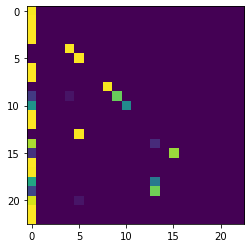

In [81]:
preds = model2.predict(X_test)
y_pred = np.argmax(preds, axis=1)
cfm = tf.math.confusion_matrix(y_test, y_pred)
cfm_cp = np.copy(cfm)
for i, row in enumerate(cfm):
    cfm_cp[i] = cfm_cp[i] * 255 / np.sum(row)
plt.imshow(cfm_cp)

In [11]:
# columns=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [12]:
# df = pd.read_csv(path, header=None)

In [13]:
# df.columns = columns
# df.columns

In [14]:
# df.head()

In [15]:
# df.mean()

In [16]:
# df.std()